In [1]:
import numpy as np
import importlib
import RegressionTree as rt
import pandas as pd
from ISLP import load_data
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import BoostedRegressionTree as brt

In [2]:
Hitters = load_data('Hitters')
Hitters = Hitters.drop(['League', 'Division', 'NewLeague'], axis=1)
Hitters = Hitters.dropna()
Hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')

In [147]:
Hitters = Hitters[['Salary', 'CHits', 'Hits', 'CAtBat']]

In [3]:
X = Hitters.drop(labels=['Salary'], axis=1)
Y = Hitters['Salary']

In [4]:
train_count = int(X.shape[0] * 0.8)
X_train, X_test = X.head(train_count), X.tail(X.shape[0] - train_count)
Y_train, Y_test = Y.head(train_count), Y.tail(X.shape[0] - train_count)

In [5]:
max_samples_leaf = 30
max_depth = 20

# implemented

In [15]:
importlib.reload(rt)
regression_tree = rt.RegressionTree(max_samples_leaf = max_samples_leaf, max_depth = max_depth)
regression_tree.fit(X_train, Y_train)

In [16]:
def print_tree(node: rt.Node, lev: int = 0) -> str:

    res = ''

    if node is None:
        return res

    sep = '___ '

    if node.compare_function is not None:
        res = res + f'{sep * lev}{node.compare_function.label}'
        res = res + '\n' if res[-1] != '\n' else res

        res = res + print_tree(node.right, lev+1)
        res = res + '\n' if res[-1] != '\n' else res

        res = res + f'{sep*lev}else'
        res = res + '\n' if res[-1] != '\n' else res

        res = res + print_tree(node.left, lev+1)
        res = res + '\n' if res[-1] != '\n' else res

    else:
        res = res + f'{sep * lev}{round(node.mean, 2)}'
        res = res + '\n' if res[-1] != '\n' else res
    
    return res
    

In [17]:
print(print_tree(regression_tree.root))

CHits >= 452.5
___ Walks >= 53.0
___ ___ RBI >= 82.0
___ ___ ___ 1398.59
___ ___ else
___ ___ ___ 858.46
___ else
___ ___ Hits >= 105.0
___ ___ ___ Assists >= 16.0
___ ___ ___ ___ 798.37
___ ___ ___ else
___ ___ ___ ___ 652.88
___ ___ else
___ ___ ___ CHmRun >= 203.0
___ ___ ___ ___ 725.0
___ ___ ___ else
___ ___ ___ ___ CHmRun >= 194
___ ___ ___ ___ ___ 1300.0
___ ___ ___ ___ else
___ ___ ___ ___ ___ RBI >= 53.0
___ ___ ___ ___ ___ ___ 698.33
___ ___ ___ ___ ___ else
___ ___ ___ ___ ___ ___ HmRun >= 4.5
___ ___ ___ ___ ___ ___ ___ 380.94
___ ___ ___ ___ ___ ___ else
___ ___ ___ ___ ___ ___ ___ 542.6
else
___ AtBat >= 126.5
___ ___ CRBI >= 118.0
___ ___ ___ 349.02
___ ___ else
___ ___ ___ CRuns >= 102.0
___ ___ ___ ___ 217.86
___ ___ ___ else
___ ___ ___ ___ CRBI >= 73.5
___ ___ ___ ___ ___ 149.89
___ ___ ___ ___ else
___ ___ ___ ___ ___ AtBat >= 453
___ ___ ___ ___ ___ ___ 195.0
___ ___ ___ ___ ___ else
___ ___ ___ ___ ___ ___ CAtBat >= 343.0
___ ___ ___ ___ ___ ___ ___ 106.0
___ ___ 

In [18]:
Y_test_pred = regression_tree.pred(X_test.to_numpy())

In [19]:
np.mean(np.abs(Y_test - Y_test_pred))

156.77944835373972

# library

In [112]:
library_tree = DecisionTreeClassifier()
library_tree.fit(X_train.to_numpy(), Y_train.to_numpy().astype(np.uint32))

DecisionTreeClassifier()

In [113]:
Y_library = library_tree.predict(X_test.to_numpy())

In [114]:
np.mean(np.abs(Y_test - Y_library))

253.59747169811322

# Simple test

In [27]:
X_simple = pd.DataFrame(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape((9, 1)))
Y_simple = pd.Series([10, 10, 10, 10, 20, 20, -5, -5, -5])

In [28]:
Y_simple

0    10
1    10
2    10
3    10
4    20
5    20
6    -5
7    -5
8    -5
dtype: int64

In [47]:
importlib.reload(rt)
simple_tree = rt.RegressionTree(3, 3)
simple_tree.fit(X_simple, Y_simple)

In [48]:
print(print_tree(simple_tree.root))

0 >= 7.5
___ -5.0
else
___ 0 >= 7
___ ___ -5.0
___ else
___ ___ 0 >= 5.5
___ ___ ___ 20.0
___ ___ else
___ ___ ___ 0 >= 5
___ ___ ___ ___ 20.0
___ ___ ___ else
___ ___ ___ ___ 10.0



In [49]:
Y_simple_pred = simple_tree.pred(X_simple.to_numpy())
print(Y_simple_pred)
print(Y_simple.to_numpy().astype(np.double))

[10. 10. 10. 10. 20. 20. -5. -5. -5.]
[10. 10. 10. 10. 20. 20. -5. -5. -5.]


In [89]:
Y_simple_pred.shape

(9,)

# Boosting implemented

In [167]:
importlib.reload(brt)
boosted_tree = brt.BoostedRegressionTree(n_estimators=100, max_depth=10, max_samples_leaf=25)
boosted_tree.fit(X_train, Y_train)

In [168]:
Y_boosted_pred = boosted_tree.pred(X_test)

In [169]:
np.mean(np.abs(Y_test - Y_boosted_pred))

217.090305634529

In [170]:
np.mean(np.abs(Y_train - boosted_tree.pred(X_train)))

105.18912641661763

# Distribution of derivatives after one iteration

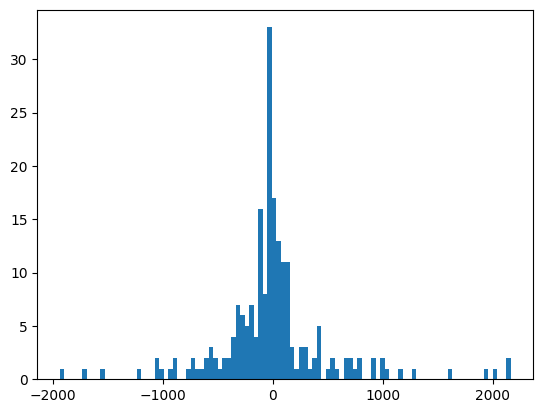

In [22]:
plt.hist(r_i, bins=100)
plt.show()